# Single Feature Genetic Separation

In [1]:
from locator import *
from phonstats import agstats
%matplotlib inline

### Make Single Feature Sets of the 192 Features
and collect some statistics

In [2]:
singles = pd.read_pickle('feature-sets/singles.pkl')
stats = pd.DataFrame([],index=binarized.columns,
             columns=['spectal index','languages','family1 count','gen2 silhouette','gen4 silhouette'])
for g in singles:
    if g.families.B() > 1:
        gen2 = g.best_silhouette('genetic',2)[0]
    if g.families.B() > 3:
        gen4 = g.best_silhouette('genetic',4)[0]
    if gen2 and gen4:
        stats.loc[g.cols[0]] = [
            g.quality_index,
            g.numrows,
            g.families.most_common(1)[0][1],
            gen2,
            gen4
        ]

In [3]:
stats[:5]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette
1A,1.93415,563,56,0.0850393,-0.0717351
2A,1.99685,564,54,0.254236,-0.0825421
3A,2.0975,564,54,-0.00703807,-0.0675571
4A,1.86094,567,56,0.242833,-0.0650953
5A,3.59881,567,56,0.160637,-0.222041


##  Here Too, the 2-Cluster and 4-Cluster Silhouette Scores are Loosely Correlated

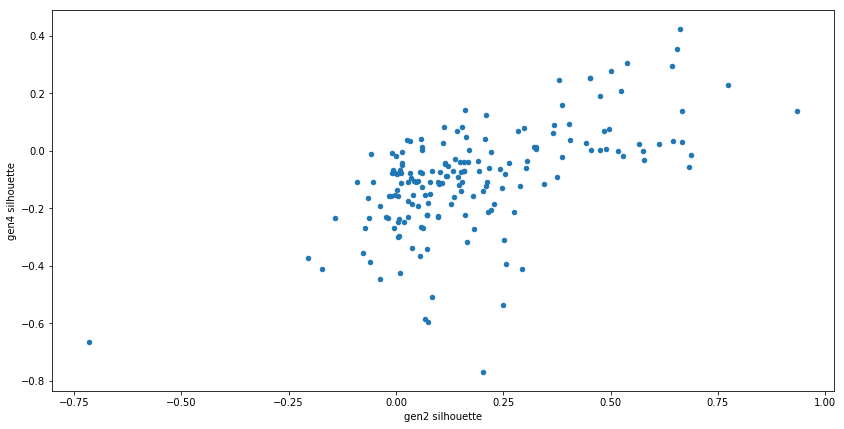

In [4]:
f = stats.loc[(stats['gen4 silhouette'] > -10) & (stats['gen2 silhouette'] > -10)]
stats['gen2 silhouette'] = pd.to_numeric(stats['gen2 silhouette'])
stats['gen4 silhouette'] = pd.to_numeric(stats['gen4 silhouette'])
stats.plot.scatter(x='gen2 silhouette',y='gen4 silhouette',figsize=(14,7))

## And some of the scores are pretty high, both in 4 and in 2 clusters

In [5]:
stats.loc[stats['gen4 silhouette'] > 0.2].index

Index(['30A', '31A', '44A', '62A', '79A', '118A', '121A', '144V', '143D',
       '39B'],
      dtype='object')

In [7]:
stats.loc[stats['gen2 silhouette'] > 0.5].index

Index(['13A', '30A', '31A', '32A', '39A', '44A', '49A', '50A', '62A', '63A',
       '66A', '79A', '99A', '121A', '129A', '135A', '144V', '81B', '144O',
       '109B', '130B'],
      dtype='object')

In [8]:
stats.sort_values(by='gen2 silhouette',ascending=False)

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette
81B,2.27338,67,12,0.933976,0.139358
79A,2.44694,193,25,0.773070,0.228445
13A,1.97475,527,55,0.687137,-0.013560
39A,3.88523,200,15,0.683331,-0.057078
144O,2.1604,31,5,0.666667,0.137024
32A,1.89109,257,23,0.666035,0.031961
30A,2.65908,257,23,0.662608,0.422585
31A,2.23379,257,23,0.655182,0.353906
99A,4.34134,172,13,0.646179,0.034949
121A,1.97015,167,19,0.643266,0.296410


## The Best Feature by 4-Cluster Silhouette Score

In [48]:
np.argmax(stats['gen4 silhouette'])

'30A'

In [49]:
g = ColGroup(['30A'])
g.determine_spectral_data()
print("Genetic Separation for 30A by 2 Clusters:")
g.gen_separation()

Genetic Separation for 30A by 2 Clusters:


0.66260787603384064

In [50]:
print("Four Clusters:")
g.gen_separation(4)

Four Clusters:


0.42258493709806727

In [51]:
print(g)

1 long group covering 257 languages
in mode PCA:
quality index: 2.66
PC1: 53%
PC2: 23%
fields: 'nominal_categories': 1
features:
30A Number of Genders
family1: 23 (Niger-Congo)
family2: 21 (Austronesian)
silhouettes:
genetic-2: 0.66 (1 PCs)
genetic-4: 0.42 (3 PCs)




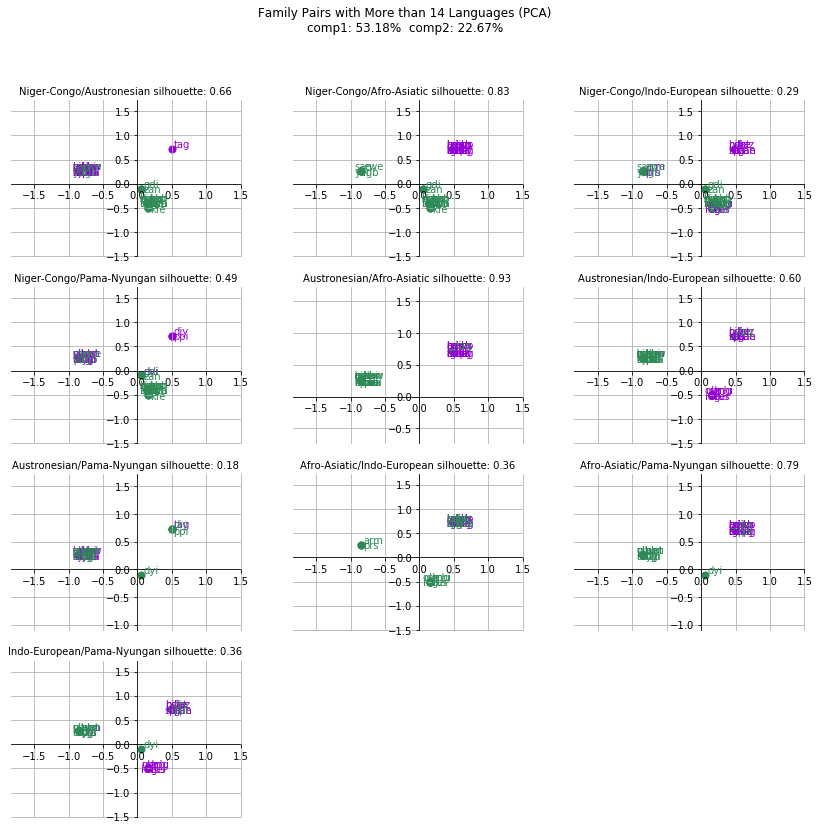

In [52]:
g.plot_multifam()

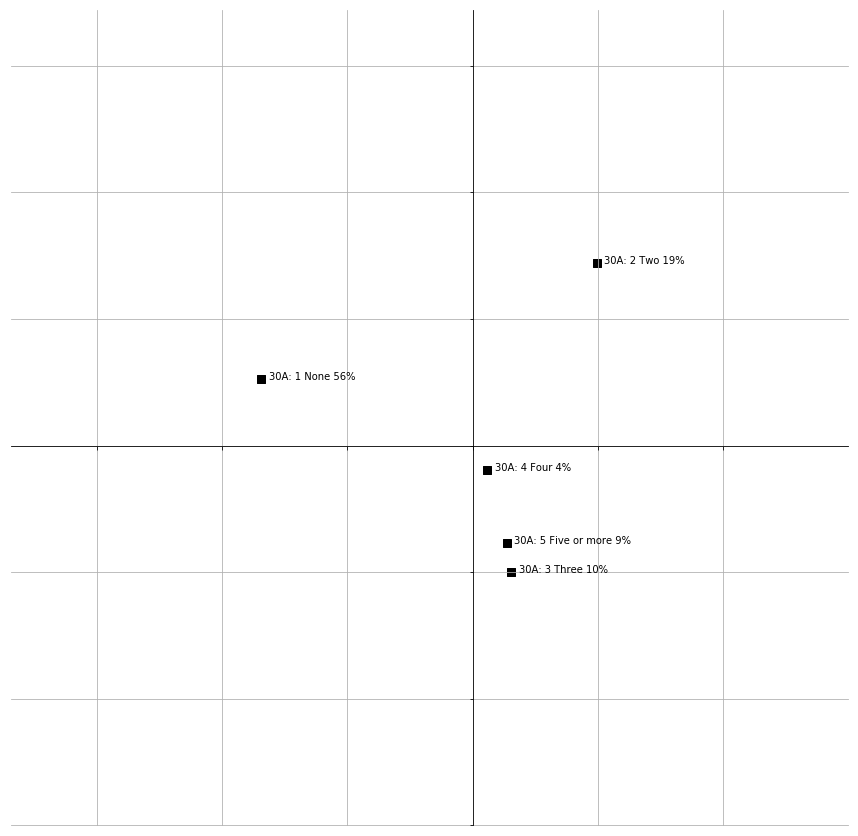

In [53]:
g.plot_vars()

So, for example, Niger-Congo Languages strangley either have 3,4,5 or no gender, but never 2 genders, while Afro-Asiatic languages always have two genders (in the 257 covered by this feature -- see top middle plot).

And likewise you can find numrous simple, single feature rules that classify families this way.

Quick Check that this is so:

In [54]:
print("Niger-Congo Values of 30A:")
print(wals.loc[(wals['family'] == 'Niger-Congo') & (wals['30A'] != '')]['30A'])

Niger-Congo Values of 30A:
196     5 Five or more
456     5 Five or more
591     5 Five or more
665             1 None
674     5 Five or more
725             4 Four
778            3 Three
904             1 None
1049           3 Three
1084    5 Five or more
1164    5 Five or more
1319    5 Five or more
1368    5 Five or more
1746    5 Five or more
1808    5 Five or more
1812    5 Five or more
2050            1 None
2091    5 Five or more
2193    5 Five or more
2201    5 Five or more
2625            1 None
2653            4 Four
2675    5 Five or more
Name: 30A, dtype: object


In [55]:
print("Afro-Asiatic Values of 30A:")
print(wals.loc[(wals['family'] == 'Afro-Asiatic') & (wals['30A'] != '')]['30A'])

Afro-Asiatic Values of 30A:
11      2 Two
34      2 Two
48      2 Two
90      2 Two
134     2 Two
158     2 Two
234     2 Two
298     2 Two
399     2 Two
593     2 Two
829     2 Two
836     2 Two
932     2 Two
1299    2 Two
1476    2 Two
1506    2 Two
1853    2 Two
1969    2 Two
2000    2 Two
2266    2 Two
Name: 30A, dtype: object


Yep.

## Now,

still with 30A. Will it emerge as an important feature if we look at it's WALS area as we did for Phonology?
Following are Results for Feature Sets only from "Nominal Categories" Covering at least 200 Languages¶ 

In [10]:
nomcats = pd.read_pickle('nominalcats-200.pkl')

In [11]:
ncstats = list()
for g in nomcats:
    g.determine_spectral_data()
    top2fams = g.families.most_common(2)
    gen2 = g.best_silhouette('genetic',2)
    gen4 = g.best_silhouette('genetic',4)
    if gen2 and gen4:
        ncstats.append({
            'spectral index' : g.quality_index,
            'gen2' : gen2[0],
            'gen2 dims' : gen2[1],
            'gen4' : gen4[0],
            'gen4 dims' : gen4[1],
            'family 1' : top2fams[0][1],
            'family 2' : top2fams[1][1]
        })
ncstats = pd.DataFrame(ncstats)

In [12]:
ncstats.describe()

,family 1,family 2,gen2,gen2 dims,gen4,gen4 dims,spectral index
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,28.808824,20.176471,0.381324,1.132353,0.116176,3.294118,5.184552
std,14.192974,8.802885,0.210409,1.402603,0.097190,4.502268,1.523825
min,16.000000,12.000000,0.064395,0.000000,-0.046319,0.000000,2.994502
25%,18.000000,15.000000,0.184582,0.000000,0.059709,0.000000,4.024580
50%,24.000000,16.000000,0.384162,1.000000,0.094096,0.500000,5.123902
75%,28.250000,20.250000,0.551073,1.000000,0.164198,5.000000,5.983781
max,72.000000,46.000000,0.802500,9.000000,0.413577,16.000000,9.749381


### Let's find the ones with good silhouette scores

In [13]:
top = [ g for g in nomcats if g.best_silhouette('genetic',2)[0] > 0.5 and g.best_silhouette('genetic',4)[0] > 0.15]

In [14]:
len(top)

13

In [15]:
for g in top:
    print(len(g.cols))

3
3
3
3
3
3
3
3
3
3
3
4
4


Only 13 of them. But still...

In [61]:
loadings = agstats(top)

In [62]:
d1 = loadings.loc['component 1'][['mean_loading','std','participation']].dropna()
d1.sort_values(by='mean_loading',inplace=True,ascending=False)
d1

,mean_loading,std,participation
features,,,
31A,0.466678,0.0839198,7
50A,0.425891,0.0832408,3
49A,0.423166,0.0338685,2
32A,0.422809,0.082761,7
30A,0.380163,0.0767466,7
51A,0.204386,0.273986,6
33A,0.105461,0.114173,7
44A,0.0119494,0.00622184,2


### So 30A (and 44A) don't figure so high in the genetic separation statistics of Nominal Categories Features.

I'm not sure what to make of this.

### In the second
component 44A is very high, but 30A is even lower.

In [63]:
d2 = loadings.loc['component 2'][['mean_loading','std','participation']].dropna()
d2.sort_values(by='mean_loading',inplace=True,ascending=False)
d2

,mean_loading,std,participation
features,,,
44A,0.9308,0.00609693,2
51A,0.666507,0.396419,6
33A,0.626764,0.322626,7
50A,0.32871,0.195613,3
32A,0.111772,0.233093,7
30A,0.0674875,0.048782,7
31A,0.0630001,0.0404304,7
49A,0.035029,0.0120975,2


In [64]:
stats.sort_values(by=['gen4 silhouette','gen2 silhouette'],ascending=False,inplace=True)
stats[:10]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette
30A,2.65908,257,23,0.662608,0.422585
31A,2.23379,257,23,0.655182,0.353906
44A,3.65964,378,42,0.537198,0.305878
121A,1.97015,167,19,0.643266,0.296410
144V,4.85431,152,46,0.501939,0.276227
143D,1.2,6,3,0.452445,0.252874
39B,2,71,71,0.452445,0.252874
118A,1.67173,386,49,0.378993,0.247506
79A,2.44694,193,25,0.773070,0.228445
62A,2.12977,168,20,0.524245,0.209577


## So,
30A, 31A, 44A, 121A, 144V Separate Families nicely on their own, and not just betwenn two families, but between four. Maybe a set made up of these features could a genetic-separation super set. However, these feature don't cover enough languages together to make an interesting group. Besides, i'm not really sure  what we can learn from all this and were to go from here.



# No Spectral Analysis (Direct Plotting of Features)

For every feature, the distribution of every family on the feature categories is calculated ** and Lindstone smoothed ** the distance between these smoothed distributions (every pair of of two families with more than 10 languages) is gauged in three different measures:
- hellinger distance
- symmetric KL divergence ((KL(p,q) + KL(q,p)) / 2)
- euclidean distance

the following piece of scripts adds the mean distance between family distributions per feature.

In [65]:
for i,r in stats.iterrows():
    g = SingleCol(i)
    kls = g.KLs()
    for measure,average in kls.mean().iteritems():
        stats.loc[i,measure] = average
stats[:5]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette,euc,hellinger,symKL
30A,2.65908,257,23,0.662608,0.422585,0.697651,0.473855,1.330329
31A,2.23379,257,23,0.655182,0.353906,0.772845,0.479332,1.406645
44A,3.65964,378,42,0.537198,0.305878,0.518866,0.378807,0.770414
121A,1.97015,167,19,0.643266,0.296410,0.825518,0.571495,1.603946
144V,4.85431,152,46,0.501939,0.276227,0.509182,0.407832,0.759762


In [66]:
stats.describe()

,gen2 silhouette,gen4 silhouette,euc,hellinger,symKL
count,189.000000,178.000000,189.000000,189.000000,189.000000
mean,0.183739,-0.097754,0.420595,0.314322,0.572987
std,0.217395,0.182124,0.155962,0.101728,0.343465
min,-0.714286,-0.768819,0.053376,0.065451,0.017191
25%,0.036400,-0.190468,0.308625,0.250467,0.317886
50%,0.134669,-0.079879,0.411740,0.320196,0.522115
75%,0.288829,0.002177,0.518866,0.379313,0.763440
max,0.933976,0.422585,0.845728,0.660463,2.015711


Standard errors on the measures are pretty high.

Nevertheless, it seems that these measures are correlated between them and quite correlated with the genetic silhouettes. It looks like this:

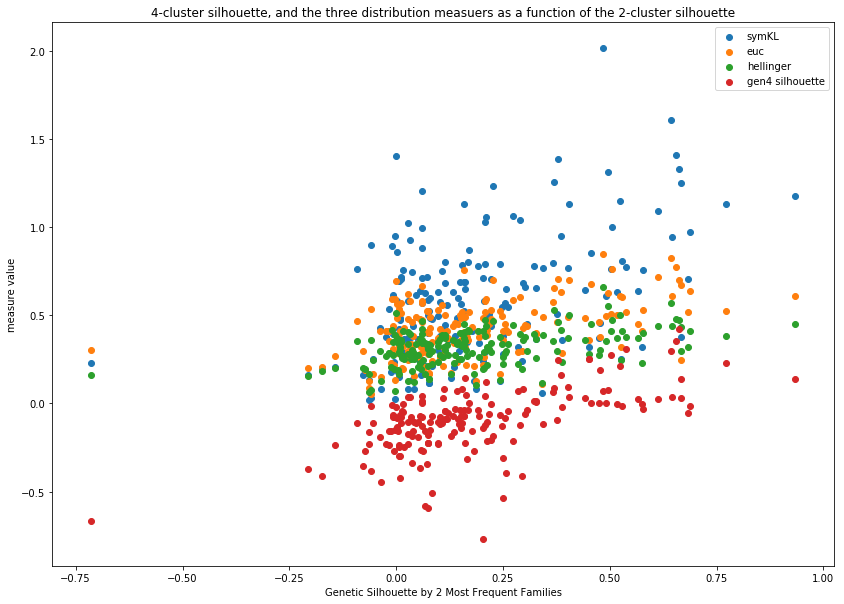

In [37]:
s = stats[['gen2 silhouette','gen4 silhouette','symKL','euc','hellinger']]
fig,ax = plt.subplots(figsize=(14,10))
for m in ['symKL','euc','hellinger','gen4 silhouette']:
    ax.scatter(x=stats['gen2 silhouette'],y=stats[m])
ax.set_title('4-cluster silhouette, and the three distribution measuers as a function of the 2-cluster silhouette')
ax.set_xlabel('Genetic Silhouette by 2 Most Frequent Families')
ax.set_ylabel('measure value')
plt.legend()
plt.show()

## Correlations between each of the 5 variables:

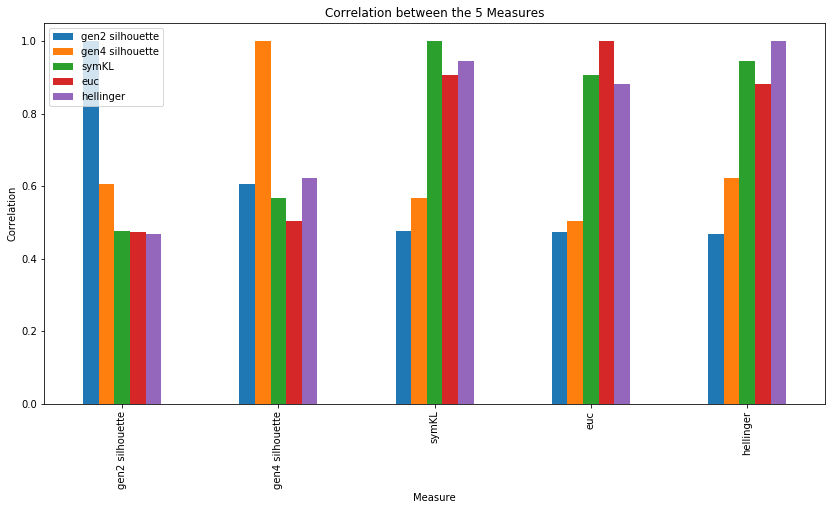

In [29]:
fig,ax = plt.subplots(figsize=(14,7))
ax.set_ylabel('Correlation')
ax.set_xlabel('Measure')
ax.set_title('Correlation between the 5 Measures')
s.corr().plot.bar(ax=ax)

so genetic silhouette by 4 families is the most correlated with genetic2 (r = 0.6), and the distribution distance measures are very similar and not too far below it with r = 0.45 roughly.

## Now
If we try to find the features that best separate between families, in light of all this correlation, we should get more or less the same ones.

Sorting the list by average hellinger distance, we get the following: 


> reminder: the number under "hellinger" column of a feature is the average Hellinger Distance between the dsitributions of language families on that feature (only families with more than 10 languages).

> since the three distribution divergence measures are almost the same, I take the Hellinger Distance because it has the lowest standard error and it is more correlated with the gen4 measure than the other two.

In [67]:
stats.sort_values(by='hellinger',ascending=False,inplace=True)

In [68]:
stats[:10]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette,euc,hellinger,symKL
123A,2.31688,112,14,0.484956,0.069084,0.845728,0.660463,2.015711
121A,1.97015,167,19,0.643266,0.296410,0.825518,0.571495,1.603946
132A,3.4175,119,12,0.495531,0.076784,0.627940,0.550121,1.310315
133A,2.20665,119,12,0.369056,0.088258,0.656800,0.527023,1.255819
97A,1.98608,1316,170,0.000363,-0.019536,0.692887,0.510810,1.403782
134A,4.27641,120,12,0.405289,0.038508,0.700140,0.502789,1.130718
62A,2.12977,168,20,0.524245,0.209577,0.606353,0.500600,1.148953
31A,2.23379,257,23,0.655182,0.353906,0.772845,0.479332,1.406645
135A,3.7252,120,12,0.504132,NaN,0.760899,0.474212,0.998148
30A,2.65908,257,23,0.662608,0.422585,0.697651,0.473855,1.330329


It's not exactly the same but note that 121A, 31A and 30A are ranking pretty high. One should also note the family 1 counts (less than 20 for many of the high ranking ones).

For Example: 30A

In [70]:
sg = SingleCol('30A',10)

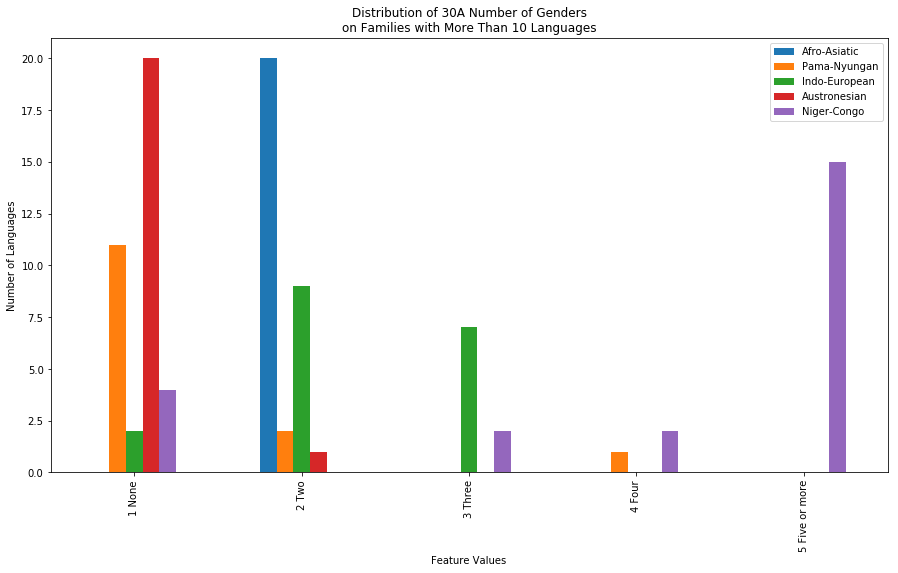

In [71]:
sg.plot_multifam_bars()

The Measures for this feature are:

In [73]:
kls = sg.KLs()
kls

euc  hellinger     symKL
fam1          fam2                                        
Niger-Congo   Austronesian   0.917625   0.605971  1.682557
              Afro-Asiatic   1.083060   0.770807  2.952320
              Indo-European  0.785813   0.630816  1.877568
              Pama-Nyungan   0.791524   0.556918  1.398295
              Sino-Tibetan   0.877422   0.552999  1.349497
              Altaic         0.877422   0.552999  1.349497
Austronesian  Afro-Asiatic   1.200246   0.744567  2.686291
              Indo-European  0.917336   0.606680  1.624808
              Pama-Nyungan   0.208459   0.164785  0.111334
              Sino-Tibetan   0.051628   0.077035  0.023909
              Altaic         0.051628   0.077035  0.023909
Afro-Asiatic  Indo-European  0.573123   0.401780  0.717708
              Pama-Nyungan   1.018390   0.638087  1.894709
              Sino-Tibetan   1.195217   0.763562  2.862338
              Altaic         1.195217   0.763562  2.862338
Indo-European Pama-Nyungan   0.738229   0.513724  1.137832
              Sino-Tibetan   0.895289   0.600291  1.579804
              Altaic         0.895289   0.600291  1.579804
Pama-Nyungan  Sino-Tibetan   0.188873   0.164520  0.111197
              Altaic         0.188873   0.164520  0.111197
Sino-Tibetan  Altaic         0.000000   0.000000  0.000000

In total (compare with input 66):

In [75]:
kls.describe()

,euc,hellinger,symKL
count,21.000000,21.000000,21.000000
mean,0.697651,0.473855,1.330329
std,0.409312,0.255009,1.004398
min,0.000000,0.000000,0.000000
25%,0.208459,0.164785,0.111334
50%,0.877422,0.556918,1.398295
75%,0.917625,0.630816,1.877568
max,1.200246,0.770807,2.952320


We can see that distribution of the top families on this feature are very differrent, and indeed it separates
families by all measures.

But what about 97A? it has a very good distribution distance average, but a very poor silhouette (both 2 and 4):

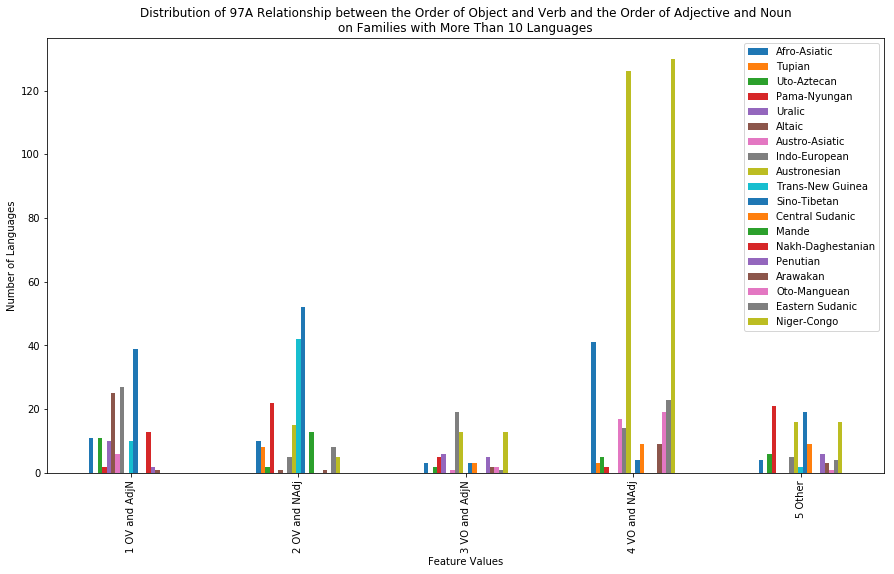

In [77]:
g = SingleCol('97A',10)
g.plot_multifam_bars()

This Feature covers a lot of languages, we can take a higher threshold to see what's what:

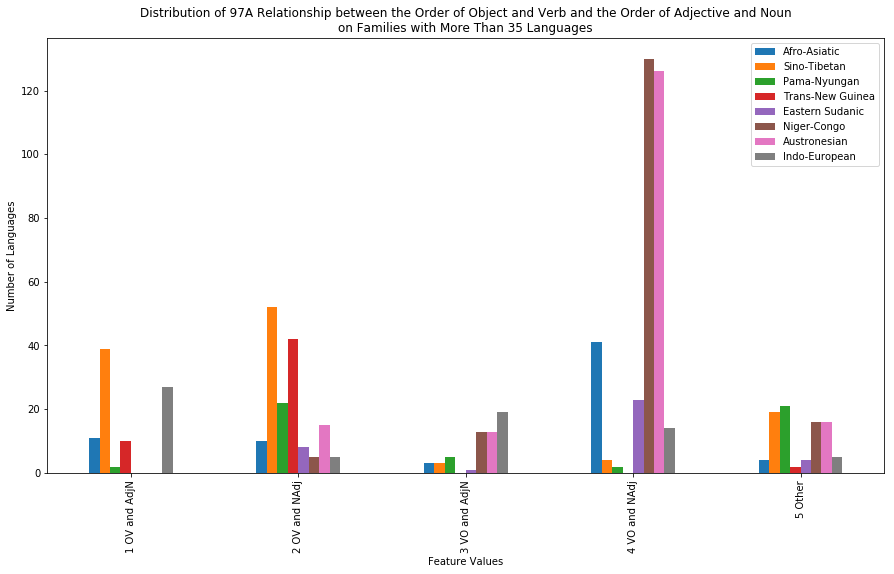

In [79]:
g.mincount = 35
g.plot_multifam_bars()

So Sino-Tibetan vs. Afro-Asiatic (for example) should  give a high silhouette:

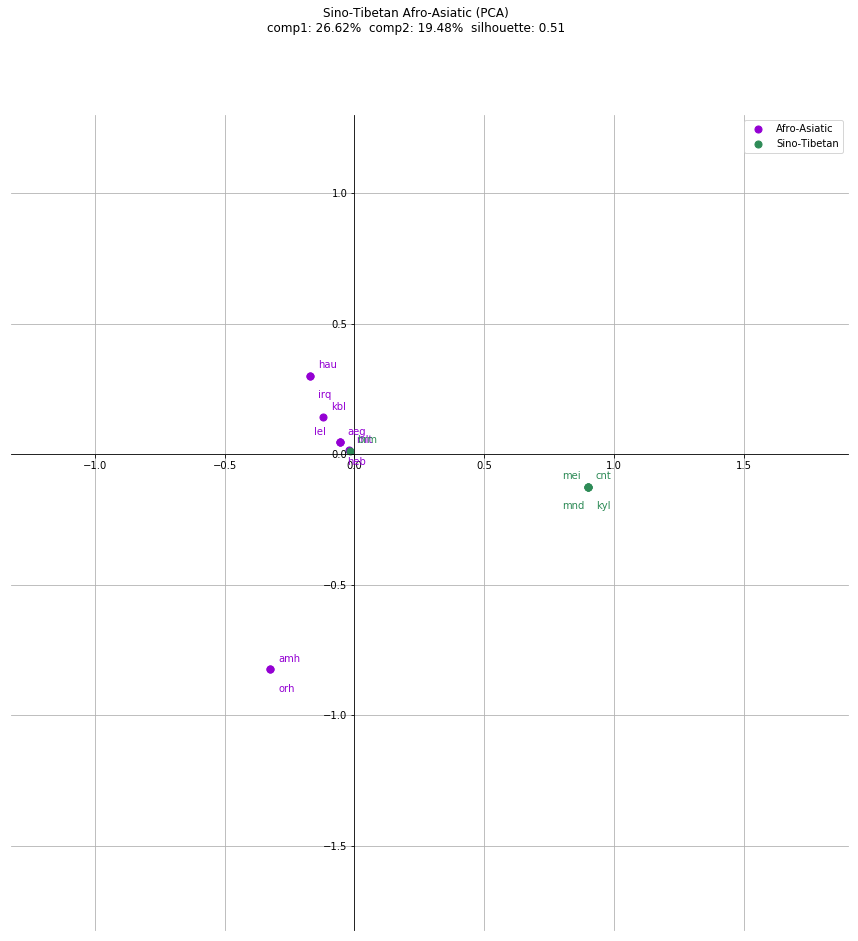

In [102]:
g.plot_families(['Sino-Tibetan','Afro-Asiatic'])

But on the top 2 and top 4 families the clustering is bad:

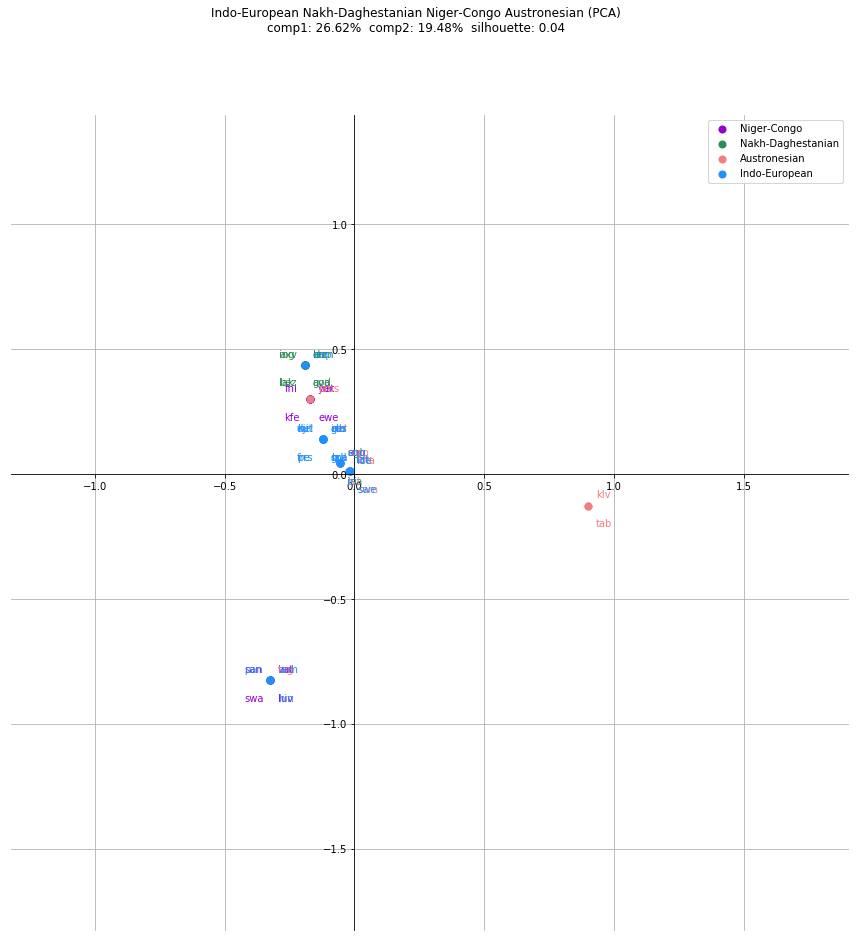

In [103]:
g.plot_families(4)

Dan, what do we make of this?

## Of Course,
the worst ones are much worse.

In [104]:
stats.iloc[-5:]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette,euc,hellinger,symKL
65A,2,222,23,-0.002733,-0.153173,0.134697,0.067669,0.022305
21B,4.01294,160,10,-0.063158,-0.232422,0.086835,0.065451,0.017191
39B,2,71,71,0.452445,0.252874,NaN,NaN,NaN
139A,2.87958,35,35,0.073543,-0.223515,NaN,NaN,NaN
140A,2.19181,38,38,0.073543,-0.223515,NaN,NaN,NaN


In [105]:
gb = SingleCol('65A',10)

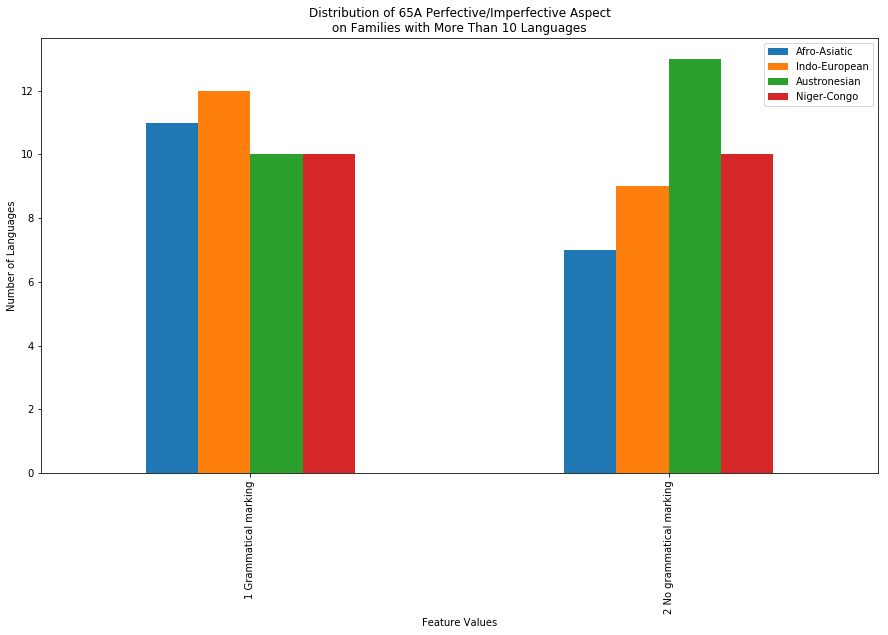

In [106]:
gb.plot_multifam_bars()

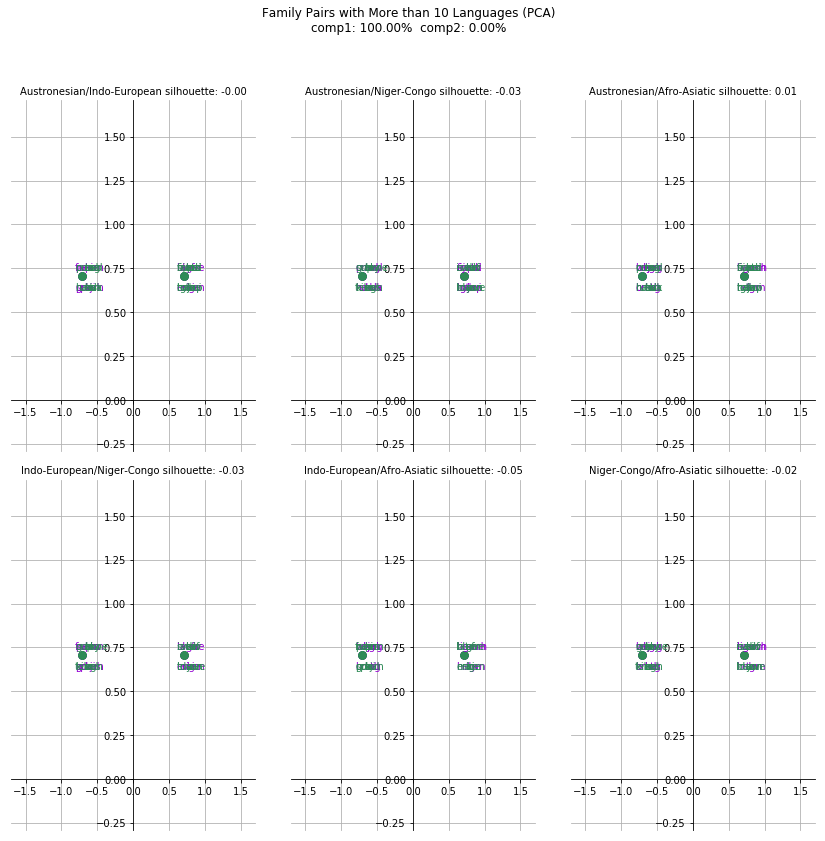

In [107]:
gb.plot_multifam(10)

## Finally,
If we take only features whose most frequent family inlcludes has a coverage of at least 20 languages, 
the overall picture seems colser to the one above (sorting by silhouettes). Again, what do we make of 97A,95A, and 81A? 
All of them cover a lot more languages, and (subsequently?) have low silhouettes but high average distribution distance. 

In [108]:
stats[stats['family1 count'] >= 20][:10]

,spectal index,languages,family1 count,gen2 silhouette,gen4 silhouette,euc,hellinger,symKL
97A,1.98608,1316,170,0.000363,-0.019536,0.692887,0.510810,1.403782
62A,2.12977,168,20,0.524245,0.209577,0.606353,0.500600,1.148953
31A,2.23379,257,23,0.655182,0.353906,0.772845,0.479332,1.406645
30A,2.65908,257,23,0.662608,0.422585,0.697651,0.473855,1.330329
117A,1.62961,240,25,0.207670,0.040179,0.579330,0.472069,1.030935
57A,2.05542,902,113,0.227558,-0.184377,0.697874,0.468597,1.232039
95A,3.12917,1142,154,0.059548,0.041236,0.663789,0.467044,1.203215
118A,1.67173,386,49,0.378993,0.247506,0.706194,0.462442,1.384131
144B,3.20518,609,114,0.274038,-0.214140,0.584142,0.446384,1.061525
81A,3.91222,1377,188,0.209461,0.123004,0.592650,0.436477,1.054708


## But! 62A 

also did not come up on the sort by silhoutte method, and takes secod place here. How did that happen? (note that it has pretty high genetic silhouettes too)

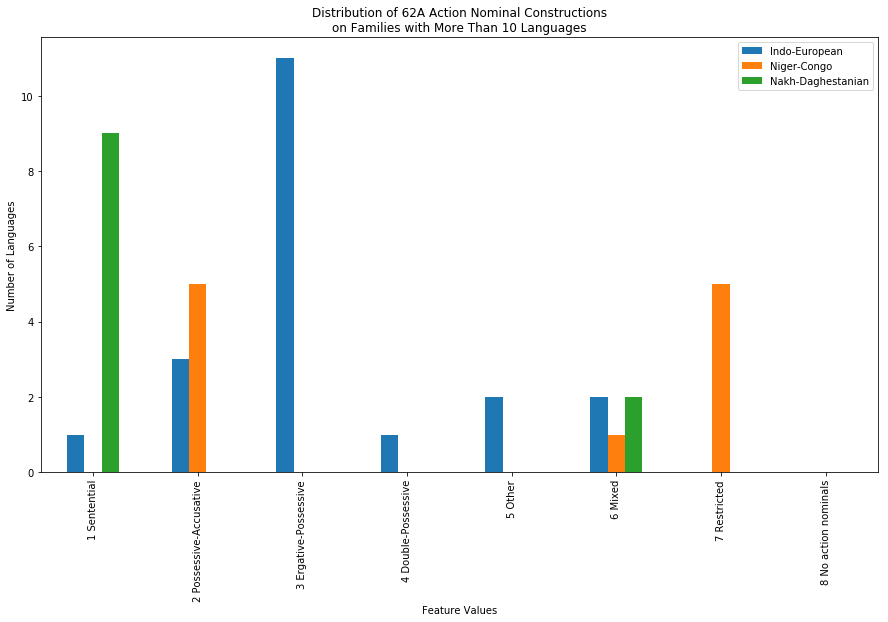

In [109]:
g = SingleCol('62A',10)
g.plot_multifam_bars()

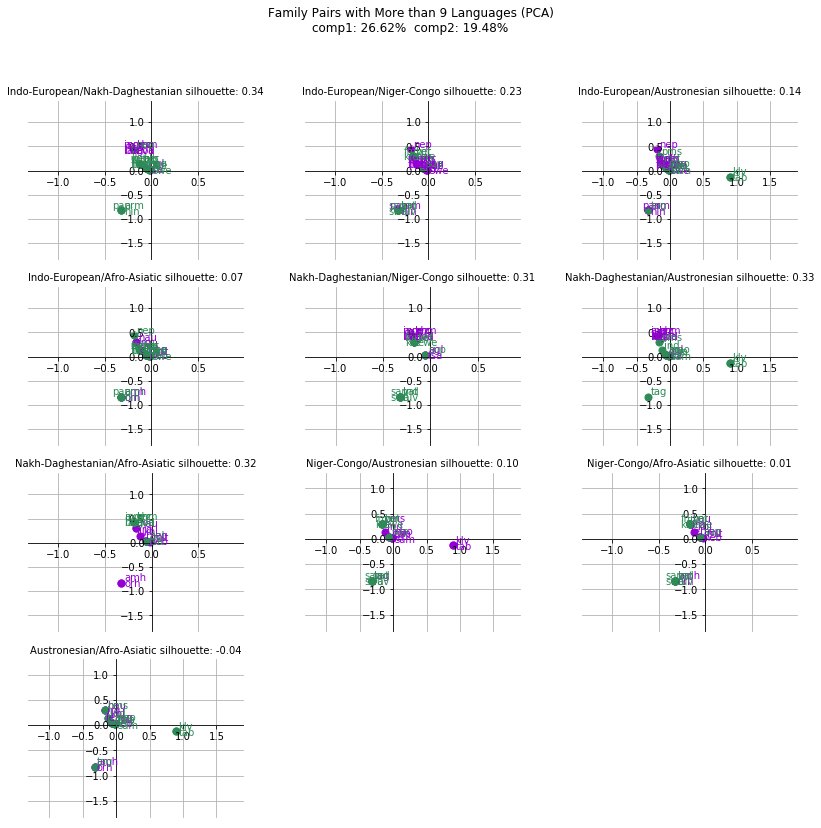

In [110]:
g.plot_multifam()

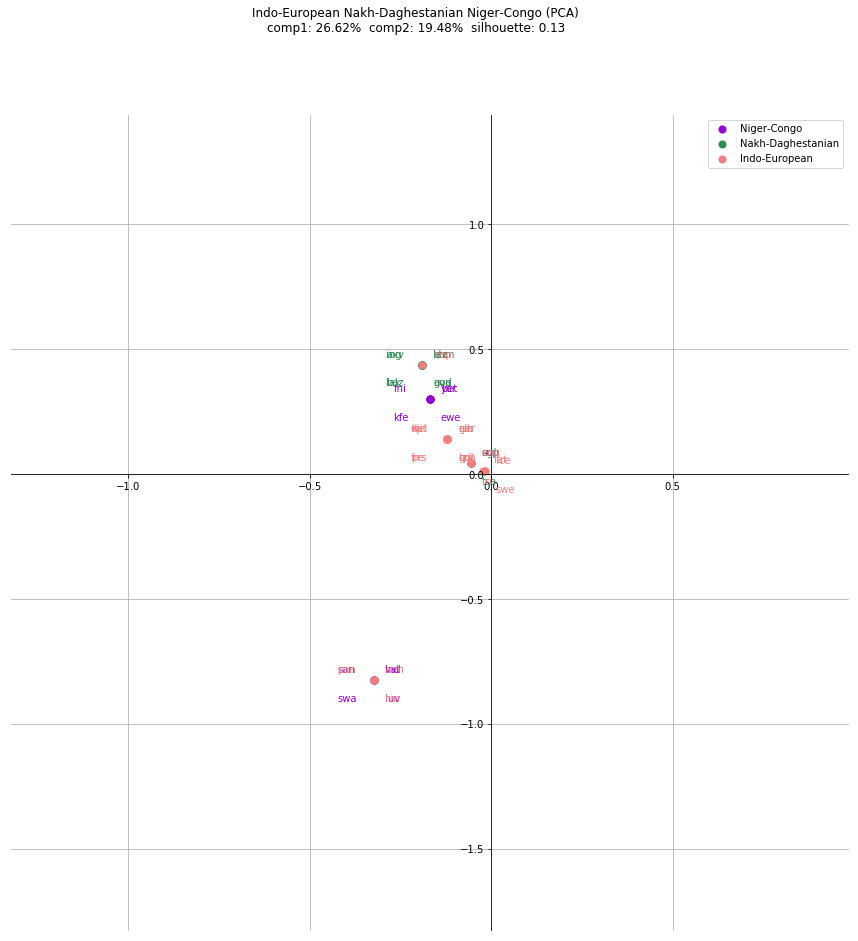

In [111]:
g.plot_families(3)

## Bottom Line:
I'm confused. What do we learn from all this?

In [112]:
g.gen_separation(2)
g.gen_separation(4)
g.silhouettes

,0,1,2,3,4,5,6,7,8,9
genetic-2,0.394351,0.394351,0.225789,0.341805,0.524245,0.446995,0.422843,0.409540,0.394351,0.394351
genetic-4,0.209577,0.209577,-0.027465,0.041912,0.159111,0.198357,0.198821,0.204566,0.209577,0.209577


Note that the high gen2 silhouette is obtained at 4 PCs